In [1]:
import emoji
import numpy as np
import pandas as pd
import glob
import re

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_rows = 400

In [4]:
data_path = './data'

def read_csvs(data_path):
    all_files = glob.glob(data_path + "/*.csv")

    df_list = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=0)
        df_list.append(df)

    df = pd.concat(df_list, axis=0, ignore_index=True)
    return df

In [5]:
df = read_csvs(data_path)
df.head()

,text,created_at,id,retweet_count,reply_count,like_count,quote_count,hashtags
0,Waterloo region: Free Rapid Antigen Screening ...,2021-09-23T20:27:02.000Z,1441137048421687300,16,1,31,2,[]
1,Kitchener - Cambridge - Stratford: Free Rapid ...,2021-09-23T20:57:11.000Z,1441144639210197002,3,0,8,1,[]
2,Ontario Businesses with &lt; 150 Employees: Fr...,2021-09-23T21:23:52.000Z,1441151353372307457,10,0,16,1,[]
3,"Ontario High-Risk Communities, Organizations a...",2021-09-23T21:25:48.000Z,1441151840633057287,4,1,11,2,[]
4,"Ontario, Manitoba, Saskatchewan, and Alberta: ...",2021-09-23T23:22:56.000Z,1441181317455126529,15,1,16,0,[]


In [6]:
def clean_hashtags(df):
    """
    NEED TO DO:
    - Simplify the code so that one part gets a list of list and another part cleans each sublist
    """
    if df is not None:
        hashtag_df = df[['hashtags']].applymap(lambda x: [h.lower() for h in x])
        hashtag_df = hashtag_df.applymap(lambda x: [re.sub(r'[^\w\s]+', '', h) for h in x])
        hashtag_df = hashtag_df.applymap(lambda x: [emoji.get_emoji_regexp().sub("", h) for h in x])
        df = df.rename(columns = {'hashtags': 'raw_hashtags'})
        df = pd.concat([df, hashtag_df], axis=1)
    return df


def clean_data(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['hashtags'] = df['hashtags'].apply(eval).tolist()
    df = clean_hashtags(df)
    return df

In [7]:
clean_df = clean_data(df)
clean_df.tail()

,text,created_at,id,retweet_count,reply_count,like_count,quote_count,raw_hashtags,hashtags
1625,Updates on RATs related to Omicron:\n\n- use s...,2022-01-05 16:16:47+00:00,1478762411033301003,53,6,101,4,[],[]
1626,@RunWaterloo @AnthonyJoch #ctfWaterlooRATs rap...,2022-01-05 16:18:00+00:00,1478762715632082949,0,1,1,0,[#ctfWaterlooRATs],[ctfwaterloorats]
1627,[BC] Vancouver: 🆓 2-pack of RATs at City Centr...,2022-01-05 20:52:03+00:00,1478831683143012353,5,1,8,1,[#ctfBC],[ctfbc]
1628,Now is the time for the provincial governments...,2022-01-05 20:58:29+00:00,1478833301473402881,24,5,76,0,[#FreeTheRATs],[freetherats]
1629,Rapid antigen tests have never been a problem ...,2022-01-05 21:03:51+00:00,1478834655528894464,32,11,109,3,[#FreeTheRATs❓❔],[freetherats]


In [8]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

print(to_1D(clean_df["hashtags"]).value_counts())

freetherats                     458
rapidtests                      165
rapidkits4kids                   79
rapidtest                        45
testtoprotect                    39
testtraceisolate                 23
ctfns                            20
ctfkitchenerrats                 18
ctfbc                            18
ctftorontorats                   15
3dosesnow                        14
onpoli                           13
ventilate2educate                12
ctfon                            12
ctfottawarats                    12
rapidkits4all                    12
longcovid                        11
ctfsk                            11
shoppersdougmart                 11
ctfmississaugarats                9
rapidtesting                      9
covidisairborne                   9
ctfnepeanrats                     9
ctfhamiltonrats                   9
vaxtothemax                       8
gatornation                       8
covid19bc                         7
thisisourshotca             

<AxesSubplot:>

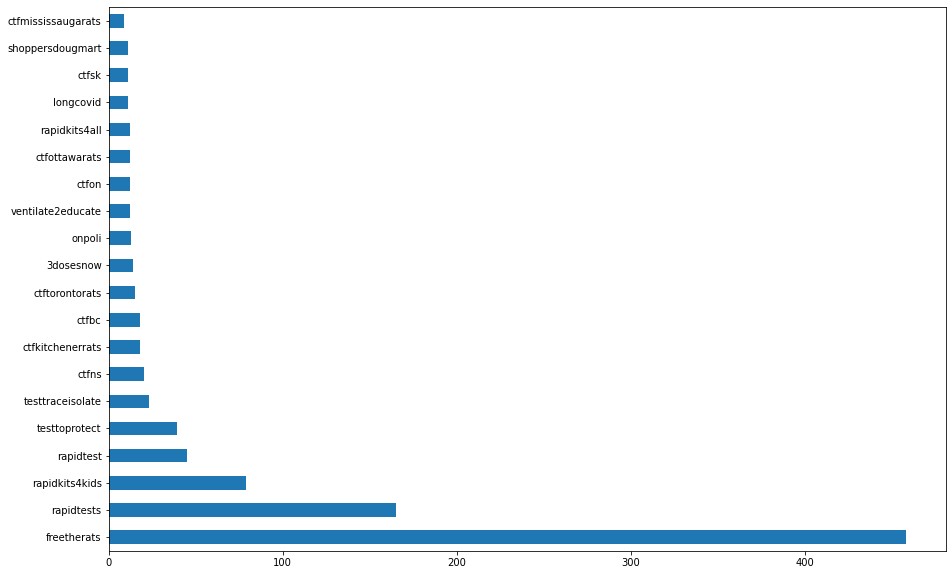

In [20]:
to_1D(clean_df["hashtags"]).value_counts().head(20).plot(kind='barh', figsize=(15,10))

In [9]:
def categorize_tweets(df):
    # advocacy
    
    # test availability
    
    # education
    
    # media
    
    
    
    pass
    

In [10]:
clean_df.sort_values(by='retweet_count', ascending=False).head(20)

,text,created_at,id,retweet_count,reply_count,like_count,quote_count,raw_hashtags,hashtags
803,RT @CheriDiNovo: FINALLY @CP24 and others are ...,2021-12-09 02:21:55+00:00,1468767838756352003,661,0,0,0,"[#FreetheRATS, #RapidTests]","[freetherats, rapidtests]"
828,RT @Billius27: Just remember you are not askin...,2021-12-09 06:41:13+00:00,1468833092077076480,619,0,0,0,[],[]
1057,Ontario: 🆓 Rapid Antigen Tests:\n\nToronto:\n➡...,2021-12-15 19:52:50+00:00,1471206634831630350,230,59,578,32,[],[]
791,RT @nilikm: Show of hands: Who wants their pro...,2021-12-10 15:02:26+00:00,1469321616190496769,200,0,0,0,[],[]
821,RT @TaraSlone: We are coming up on 2 years int...,2021-12-09 06:23:29+00:00,1468828627865374724,200,0,0,0,[],[]
684,RT @caryn_lieberman: “Given how many outbreaks...,2021-12-08 14:12:59+00:00,1468584394357100548,191,0,0,0,[],[]
824,RT @DrVivianS: What kind of nonsense is this @...,2021-12-09 06:35:49+00:00,1468831734053711874,186,0,0,0,[],[]
509,RT @gator_gum: It's here! Followback Saturday!...,2021-11-27 18:06:06+00:00,1464656795427868680,165,0,0,0,[],[]
1530,Ontario: Please consider anonymously self-repo...,2022-01-02 01:58:38+00:00,1477459288524308482,138,9,211,4,[],[]
1563,As Premier Ford just announced he is going to ...,2022-01-03 16:50:27+00:00,1478046107787792384,127,41,779,20,[#FreeTheRATs],[freetherats]


In [11]:
clean_df.sort_values(by='like_count', ascending=False).head(20)

,text,created_at,id,retweet_count,reply_count,like_count,quote_count,raw_hashtags,hashtags
1563,As Premier Ford just announced he is going to ...,2022-01-03 16:50:27+00:00,1478046107787792384,127,41,779,20,[#FreeTheRATs],[freetherats]
1057,Ontario: 🆓 Rapid Antigen Tests:\n\nToronto:\n➡...,2021-12-15 19:52:50+00:00,1471206634831630350,230,59,578,32,[],[]
341,@BogochIsaac 💯 \n\nIn a nutshell: the Swiss Ch...,2021-11-11 00:51:37+00:00,1458598253558222849,118,38,420,12,[],[]
24,@gator_gum thank you for getting our account o...,2021-09-26 02:36:05+00:00,1441954698626355209,95,9,371,5,[#rapidtests],[rapidtests]
1097,Toronto: We are getting reports that there are...,2021-12-16 13:16:20+00:00,1471469239928295426,56,20,314,5,[#FreeTheRATs],[freetherats]
279,It is with a heavy heart we say goodbye to the...,2021-10-28 14:15:33+00:00,1453727137077153809,19,4,240,5,[],[]
943,🔥 @DFisman thank you for supporting us in our ...,2021-12-11 13:15:38+00:00,1469657126004011012,59,3,236,3,[#FreeTheRATs],[freetherats]
998,"Until we #FreeTheRATs, pre-register for our fi...",2021-12-14 13:32:29+00:00,1470748530155442179,114,19,227,15,"[#FreeTheRATs,, #ctfPOPUP]","[freetherats, ctfpopup]"
716,1/ As the holidays draw closer we would like t...,2021-12-07 04:24:39+00:00,1468073947321221121,115,6,224,16,"[#FreeTheRATs, #RapidTests, #rapidtests4all]","[freetherats, rapidtests, rapidtests4all]"
1589,We urge any province (e.g. Ontario) using a 5 ...,2022-01-04 14:11:00+00:00,1478368367975272453,62,13,219,7,[],[]


array([[<AxesSubplot:xlabel='created_at'>,
        <AxesSubplot:xlabel='created_at'>],
       [<AxesSubplot:xlabel='created_at'>,
        <AxesSubplot:xlabel='created_at'>],
       [<AxesSubplot:xlabel='created_at'>,
        <AxesSubplot:xlabel='created_at'>],
       [<AxesSubplot:xlabel='created_at'>,
        <AxesSubplot:xlabel='created_at'>],
       [<AxesSubplot:xlabel='created_at'>,
        <AxesSubplot:xlabel='created_at'>]], dtype=object)

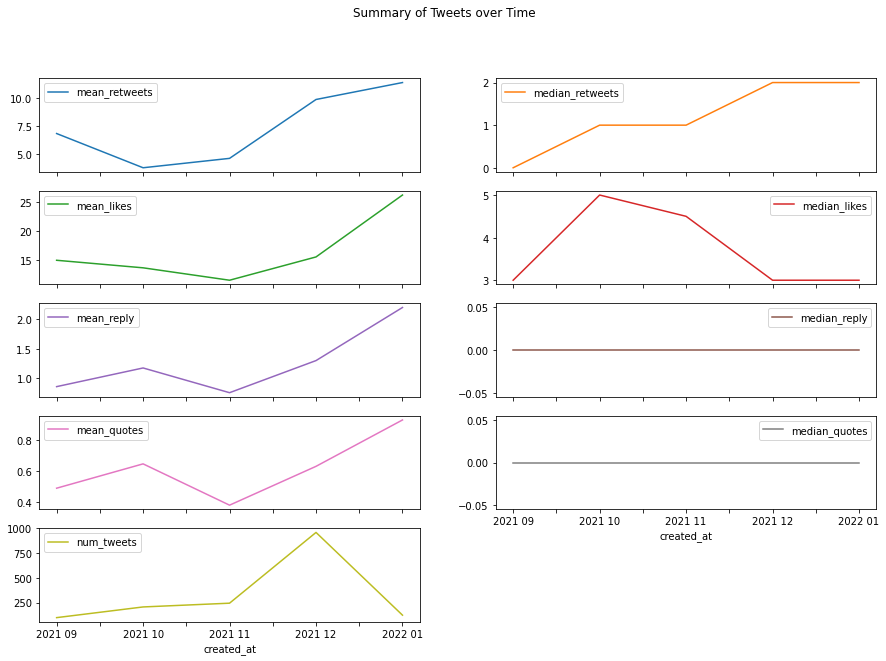

In [12]:
(
    clean_df
    .groupby([pd.to_datetime(clean_df.created_at).dt.strftime('%Y %m')])
    .agg(
        mean_retweets=('retweet_count', 'mean'), 
        median_retweets=('retweet_count', 'median'), 
        mean_likes=('like_count', 'mean'), 
        median_likes=('like_count', 'median'), 
        mean_reply=('reply_count', 'mean'), 
        median_reply=('reply_count', 'median'), 
        mean_quotes=('quote_count', 'mean'), 
        median_quotes=('quote_count', 'median'), 
        num_tweets=('retweet_count', 'count'),
        )
    .plot(subplots=True, title='Summary of Tweets over Time', layout=[5,2], figsize = (15, 10))
)